In [2]:
import surlib

ImportError: No module named sklearn.pipeline

In [2]:
import pandas as pd

In [4]:
import os

In [14]:
import re

In [43]:
adjustDf.columns

Index([u'Distance_X_LOGO_Voice1', u'Distance_X_LOGO_voice2',
       u'Distance_X_LOGO_3', u'Distance_X_LOGO_4', u'Distance_X_LOGO_5',
       u'Distance_X_LOGO_6', u'Distance_X_LOGO_7', u'Distance_X_LOGO_8',
       u'Distance_X_LOGO_9', u'Distance_X_LOGO_10', u'Distance_X_LOGO_11',
       u'Distance_X_LOGO_12', u'Distance_X_LOGO_13', u'Distance_X_LOGO_14',
       u'Distance_X_LOGO_15', u'Distance_X_LOGO_16', u'Distance_X_LOGO_17',
       u'Distance_X_LOGO_18', u'Distance_X_LOGO_19', u'Distance_X_LOGO_20',
       u'Distance_X_LOGO_21', u'Distance_X_LOGO_22', u'Distance_X_LOGO_23',
       u'Distance_X_LOGO_24', u'Distance_X_LOGO_25', u'Distance_X_LOGO_26',
       u'Distance_X_LOGO_27', u'Distance_X_LOGO_28', u'Distance_X_LOGO_29',
       u'Distance_X_LOGO_30', u'Distance_X_LOGO_31', u'Distance_X_LOGO_32',
       u'Distance_Y_LOGO_Voice1', u'Distance_Y_LOGO_voice2',
       u'Distance_Y_LOGO_3', u'Distance_Y_LOGO_4', u'Distance_Y_LOGO_5',
       u'Distance_Y_LOGO_6', u'Distance_Y_LOGO_7', u

In [45]:
beforeDf.columns

Index([u'Distance_X_LOGO_Voice1', u'Distance_X_LOGO_voice2',
       u'Distance_X_LOGO_3', u'Distance_X_LOGO_4', u'Distance_X_LOGO_5',
       u'Distance_X_LOGO_6', u'Distance_X_LOGO_7', u'Distance_X_LOGO_8',
       u'Distance_X_LOGO_9', u'Distance_X_LOGO_10', u'Distance_X_LOGO_11',
       u'Distance_X_LOGO_12', u'Distance_X_LOGO_13', u'Distance_X_LOGO_14',
       u'Distance_X_LOGO_15', u'Distance_X_LOGO_16', u'Distance_X_LOGO_17',
       u'Distance_X_LOGO_18', u'Distance_X_LOGO_19', u'Distance_X_LOGO_20',
       u'Distance_X_LOGO_21', u'Distance_X_LOGO_22', u'Distance_X_LOGO_23',
       u'Distance_X_LOGO_24', u'Distance_X_LOGO_25', u'Distance_X_LOGO_26',
       u'Distance_X_LOGO_27', u'Distance_X_LOGO_28', u'Distance_X_LOGO_29',
       u'Distance_X_LOGO_30', u'Distance_X_LOGO_31', u'Distance_X_LOGO_32',
       u'Distance_Y_LOGO_Voice1', u'Distance_Y_LOGO_voice2',
       u'Distance_Y_LOGO_3', u'Distance_Y_LOGO_4', u'Distance_Y_LOGO_5',
       u'Distance_Y_LOGO_6', u'Distance_Y_LOGO_7', u

In [83]:
for fileGet in os.listdir('./data/100SN_CASE1/'):
    if fileGet.startswith('adjust'):
        print fileGet
        # print fileAdjust
        pathToAdjust = './data/100SN_CASE1/' + fileGet
        print pathToAdjust
        adjustDf = pd.read_csv(pathToAdjust)
        adjustDf.index = adjustDf[adjustDf.columns[0]]
        del adjustDf[adjustDf.columns[0]]
        adjustDf.index.name = 'SN'
        
        # print fileBefore
        fileBefore = re.sub('adjust', 'before12', fileGet)
        pathToDiff = './data/100SN_CASE1/' + fileBefore
        print pathToDiff
        beforeDf = pd.read_csv(pathToDiff, sep='\t')
        indexBefore = [re.sub('_+', '', x) for x in beforeDf[beforeDf.columns[0]]]
        beforeDf.index = indexBefore
        del beforeDf[beforeDf.columns[0]]
        beforeDf.index.name = 'SN'
        beforeDf = beforeDf.iloc[:, 0:96]
        
        diffDf = (beforeDf - adjustDf)[adjustDf.columns]
        diffFile = re.sub('adjust', 'diff', fileGet)
        pathToOutput = './data/diffTransformed/' + diffFile
        diffDf.to_csv(pathToOutput, sep='\t')

adjust_N66_LD_Battery_Left.csv
./data/100SN_CASE1/adjust_N66_LD_Battery_Left.csv
./data/100SN_CASE1/before12_N66_LD_Battery_Left.csv
adjust_N66_LD_Battery_Up.csv
./data/100SN_CASE1/adjust_N66_LD_Battery_Up.csv
./data/100SN_CASE1/before12_N66_LD_Battery_Up.csv
adjust_N66_LD_Camera_LD.csv
./data/100SN_CASE1/adjust_N66_LD_Camera_LD.csv
./data/100SN_CASE1/before12_N66_LD_Camera_LD.csv
adjust_N66_LD_Camera_RU.csv
./data/100SN_CASE1/adjust_N66_LD_Camera_RU.csv
./data/100SN_CASE1/before12_N66_LD_Camera_RU.csv
adjust_N66_LD_Earphone_LD.csv
./data/100SN_CASE1/adjust_N66_LD_Earphone_LD.csv
./data/100SN_CASE1/before12_N66_LD_Earphone_LD.csv
adjust_N66_LD_Earphone_RU.csv
./data/100SN_CASE1/adjust_N66_LD_Earphone_RU.csv
./data/100SN_CASE1/before12_N66_LD_Earphone_RU.csv
adjust_N66_LD_Front_Camera_LD.csv
./data/100SN_CASE1/adjust_N66_LD_Front_Camera_LD.csv
./data/100SN_CASE1/before12_N66_LD_Front_Camera_LD.csv
adjust_N66_LD_Front_Camera_RU.csv
./data/100SN_CASE1/adjust_N66_LD_Front_Camera_RU.csv
./d

In [84]:
queryDf = surlib.createQueryDf('./data/diffTransformed/', tag='Normal')

In [86]:
modelObj = surlib.load_model('../model/model_20160718.dump')

In [87]:
model = modelObj[0]

In [88]:
columns = modelObj[1]

In [89]:
columns

Index([u'LD_Battery_Left_theta', u'LD_Battery_Left_thetaAbs',
       u'LD_Battery_Left_x', u'LD_Battery_Left_y', u'LD_Battery_Left_z',
       u'LD_Battery_Up_theta', u'LD_Battery_Up_thetaAbs', u'LD_Battery_Up_x',
       u'LD_Battery_Up_y', u'LD_Battery_Up_z',
       ...
       u'LU_Voice_LD_thetaAbs', u'LU_Voice_LD_x', u'LU_Voice_LD_y',
       u'LU_Voice_LD_z', u'LU_Voice_RU_theta', u'LU_Voice_RU_thetaAbs',
       u'LU_Voice_RU_x', u'LU_Voice_RU_y', u'LU_Voice_RU_z', u'label'],
      dtype='object', length=121)

0.0


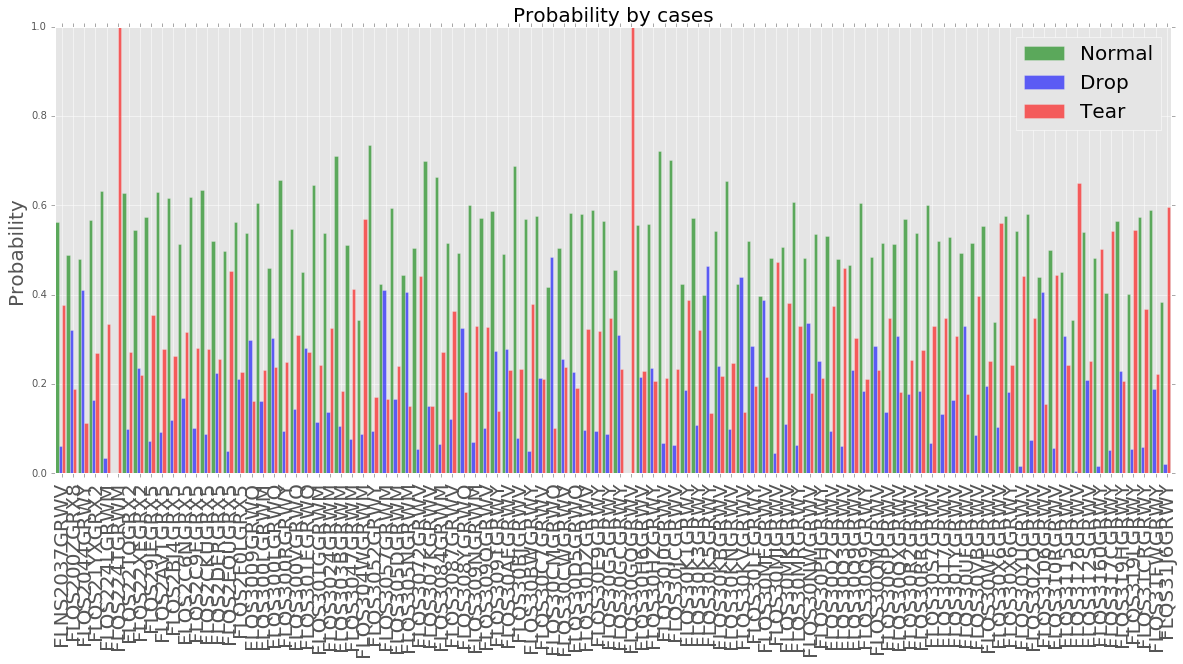

array(['duplicate', 'duplicate', 'duplicate', 'duplicate', 'duplicate',
       'tear', 'duplicate', 'duplicate', 'duplicate', 'duplicate',
       'duplicate', 'duplicate', 'duplicate', 'duplicate', 'duplicate',
       'duplicate', 'duplicate', 'duplicate', 'duplicate', 'duplicate',
       'duplicate', 'duplicate', 'duplicate', 'duplicate', 'duplicate',
       'duplicate', 'duplicate', 'tear', 'duplicate', 'duplicate',
       'duplicate', 'duplicate', 'duplicate', 'duplicate', 'duplicate',
       'duplicate', 'duplicate', 'duplicate', 'duplicate', 'duplicate',
       'duplicate', 'duplicate', 'duplicate', 'duplicate', 'drop',
       'duplicate', 'duplicate', 'duplicate', 'duplicate', 'duplicate',
       'duplicate', 'tear', 'duplicate', 'duplicate', 'duplicate',
       'duplicate', 'duplicate', 'duplicate', 'drop', 'duplicate',
       'duplicate', 'drop', 'duplicate', 'duplicate', 'duplicate',
       'duplicate', 'duplicate', 'duplicate', 'duplicate', 'duplicate',
       'duplicate', 'd

In [92]:
surlib.predict_query(queryDf, model=model, column=columns)

In [100]:
queryDf.loc['FLQS224TGRWM_avg']

comp_metric
LD_Battery_Left_x              2.30362
LD_Battery_Left_y           -0.0286689
LD_Battery_Left_theta        -0.275969
LD_Battery_Up_x                4.68927
LD_Battery_Up_y              0.0129355
LD_Battery_Up_theta          -0.286031
LD_Camera_LD_x                 2.97963
LD_Camera_LD_y              -0.0148891
LD_Camera_LD_theta           -0.276188
LD_Camera_RU_x                 2.44336
LD_Camera_RU_y              -0.0424829
LD_Camera_RU_theta           -0.271219
LD_Earphone_LD_x               2.14108
LD_Earphone_LD_y            -0.0416832
LD_Earphone_LD_theta         -0.283312
LD_Earphone_RU_x                2.3434
LD_Earphone_RU_y             -0.040961
LD_Earphone_RU_theta         -0.281969
LD_Front_Camera_LD_x           2.03288
LD_Front_Camera_LD_y        -0.0308514
LD_Front_Camera_LD_theta     -0.283469
LD_Front_Camera_RU_x           1.78702
LD_Front_Camera_RU_y        -0.0166056
LD_Front_Camera_RU_theta     -0.278125
LD_MainBoard_Corner_x          6.87411
LD_MainBoard_

In [97]:
queryDf.index

Index([u'FLNS2037GRWV_avg', u'FLQS200ZGRX8_avg', u'FLQS2044GRWY_avg',
       u'FLQS21YXGRX2_avg', u'FLQS224LGRWM_avg', u'FLQS224TGRWM_avg',
       u'FLQS22TQGRX2_avg', u'FLQS22XEGRX2_avg', u'FLQS29JFGRX5_avg',
       u'FLQS2AVTGRX5_avg', u'FLQS2BJ4GRX5_avg', u'FLQS2C6NGRX5_avg',
       u'FLQS2C9EGRX5_avg', u'FLQS2CKUGRX5_avg', u'FLQS2DERGRX5_avg',
       u'FLQS2EQUGRX5_avg', u'FLQS2F0LGRX5_avg', u'FLQS3009GRWQ_avg',
       u'FLQS300LGRWM_avg', u'FLQS300LGRWQ_avg', u'FLQS300RGRWY_avg',
       u'FLQS300VGRWQ_avg', u'FLQS301EGRWQ_avg', u'FLQS301GGRWM_avg',
       u'FLQS3024GRWM_avg', u'FLQS303BGRWM_avg', u'FLQS3047GRWM_avg',
       u'FLQS304WGRWM_avg', u'FLQS3052GRWY_avg', u'FLQS3057GRWM_avg',
       u'FLQS305DGRWM_avg', u'FLQS305NGRWM_avg', u'FLQS3072GRWV_avg',
       u'FLQS307KGRWV_avg', u'FLQS3084GRWM_avg', u'FLQS3087GRWV_avg',
       u'FLQS308YGRWQ_avg', u'FLQS309NGRWM_avg', u'FLQS309QGRWV_avg',
       u'FLQS309TGRWY_avg', u'FLQS30AEGRWV_avg', u'FLQS30BJGRWV_avg',
       u'FLQS30BWGRW

In [91]:
%matplotlib inline

In [94]:
queryDfBefore = surlib.createQueryDf('./data/noDiffTransformed/', tag='Normal')

0.0


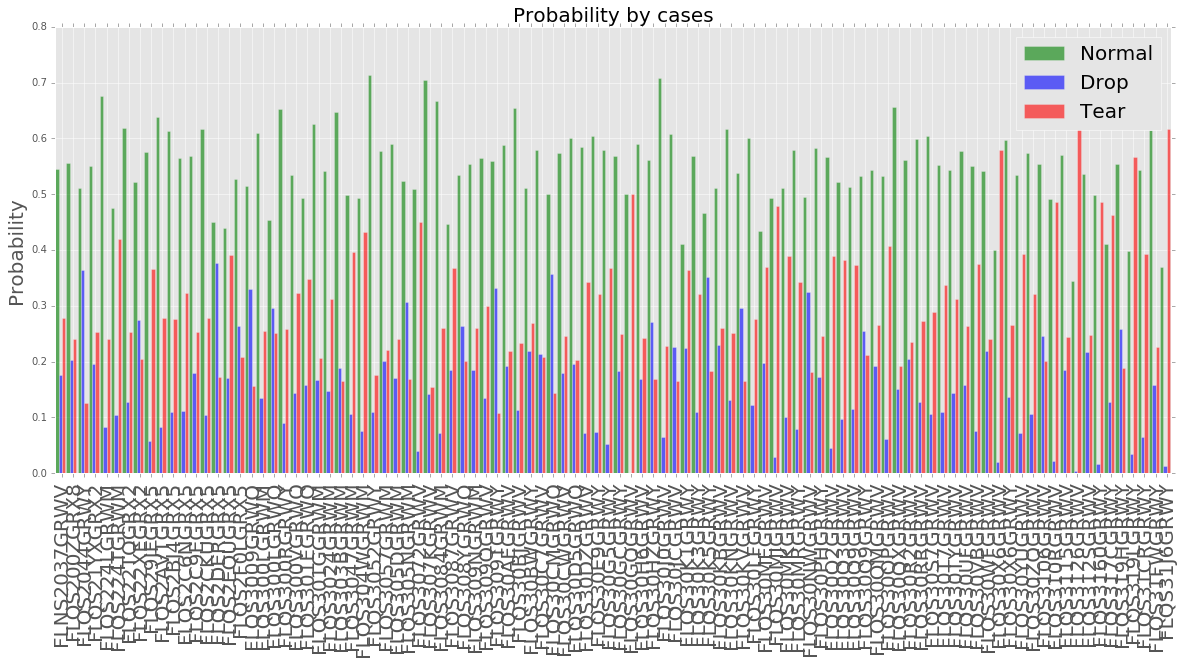

array(['duplicate', 'duplicate', 'duplicate', 'duplicate', 'duplicate',
       'duplicate', 'duplicate', 'duplicate', 'duplicate', 'duplicate',
       'duplicate', 'duplicate', 'duplicate', 'duplicate', 'duplicate',
       'duplicate', 'duplicate', 'duplicate', 'duplicate', 'duplicate',
       'duplicate', 'duplicate', 'duplicate', 'duplicate', 'duplicate',
       'duplicate', 'duplicate', 'duplicate', 'duplicate', 'duplicate',
       'duplicate', 'duplicate', 'duplicate', 'duplicate', 'duplicate',
       'duplicate', 'duplicate', 'duplicate', 'duplicate', 'duplicate',
       'duplicate', 'duplicate', 'duplicate', 'duplicate', 'duplicate',
       'duplicate', 'duplicate', 'duplicate', 'duplicate', 'duplicate',
       'duplicate', 'tear', 'duplicate', 'duplicate', 'duplicate',
       'duplicate', 'duplicate', 'duplicate', 'duplicate', 'duplicate',
       'duplicate', 'duplicate', 'duplicate', 'duplicate', 'duplicate',
       'duplicate', 'duplicate', 'duplicate', 'duplicate', 'duplicate

In [95]:
surlib.predict_query(queryDfBefore, model=model, column=columns)

In [108]:
queryDf

comp_metric,LD_Battery_Left_x,LD_Battery_Left_y,LD_Battery_Left_theta,LD_Battery_Up_x,LD_Battery_Up_y,LD_Battery_Up_theta,LD_Camera_LD_x,LD_Camera_LD_y,LD_Camera_LD_theta,LD_Camera_RU_x,...,LU_Button_LD_z,LU_Button_RU_z,LU_MainBoard_LD_z,LU_MainBoard_RD_z,LU_MainBoard_Sim_z,LU_Motor_LD_z,LU_Motor_RU_z,LU_Voice_LD_z,LU_Voice_RU_z,label
FLNS2037GRWV_avg,0.022444,0.077022,0.115656,0.065277,0.103499,0.093719,0.011040,0.041604,0.118719,-0.015550,...,0.103273,0.090115,0.057133,0.047036,0.057987,0.132725,0.050878,0.072207,0.063071,Normal
FLQS200ZGRX8_avg,-0.058823,0.000936,0.004375,-0.075000,-0.000945,0.010125,-0.046741,-0.038303,0.001062,-0.057821,...,0.031603,0.047674,0.029108,0.076481,0.103023,0.114360,0.113990,0.098505,0.120415,Normal
FLQS2044GRWY_avg,-0.032789,0.033885,-0.034375,0.040394,-0.068635,-0.063500,-0.052274,-0.009806,-0.035594,-0.035963,...,0.037302,0.020034,0.065151,0.023498,0.041087,0.033127,0.091824,0.038738,0.043753,Normal
FLQS21YXGRX2_avg,-0.029901,0.015266,-0.206062,0.058760,-0.011961,-0.245594,0.041531,-0.014409,-0.236531,0.032748,...,0.027062,0.034674,0.040955,0.041874,0.061304,0.072520,0.072972,0.021681,0.048420,Normal
FLQS224LGRWM_avg,0.096666,0.012595,-0.081813,0.136759,0.043592,-0.116781,0.074854,0.090481,-0.114281,0.096627,...,0.178464,0.172869,0.071232,0.101216,0.175738,0.218125,0.145771,0.179219,0.168951,Normal
FLQS224TGRWM_avg,2.303619,-0.028669,-0.275969,4.689271,0.012936,-0.286031,2.979625,-0.014889,-0.276188,2.443358,...,478.675785,415.930579,96.482573,111.909799,39.879849,173.977362,253.756676,383.507445,256.735221,Normal
FLQS22TQGRX2_avg,-0.020795,0.027138,0.270719,0.019503,0.058617,0.250812,0.046544,0.039831,0.246000,0.043890,...,0.029870,0.059530,0.009694,0.025717,0.031728,0.047465,0.043216,0.022752,0.019586,Normal
FLQS22XEGRX2_avg,0.009312,-0.025327,-0.006344,0.029036,0.050312,-0.019844,0.030684,0.015246,-0.016594,0.036421,...,0.053565,0.028312,0.047761,0.026778,0.029230,0.044463,0.071185,0.025149,0.041271,Normal
FLQS29JFGRX5_avg,0.061277,0.024741,0.221906,0.073494,0.007309,0.218469,0.059570,0.026454,0.225250,0.072117,...,0.022297,0.029681,0.020645,0.028684,0.068174,0.078778,0.081564,0.047660,0.075118,Normal
FLQS2AVTGRX5_avg,0.056811,0.145267,-0.104219,0.032007,0.011195,-0.086625,0.012924,0.019657,-0.078969,0.036472,...,0.067372,0.089898,0.067066,0.051974,0.012876,0.009079,0.102238,0.065319,0.014469,Normal


0.0


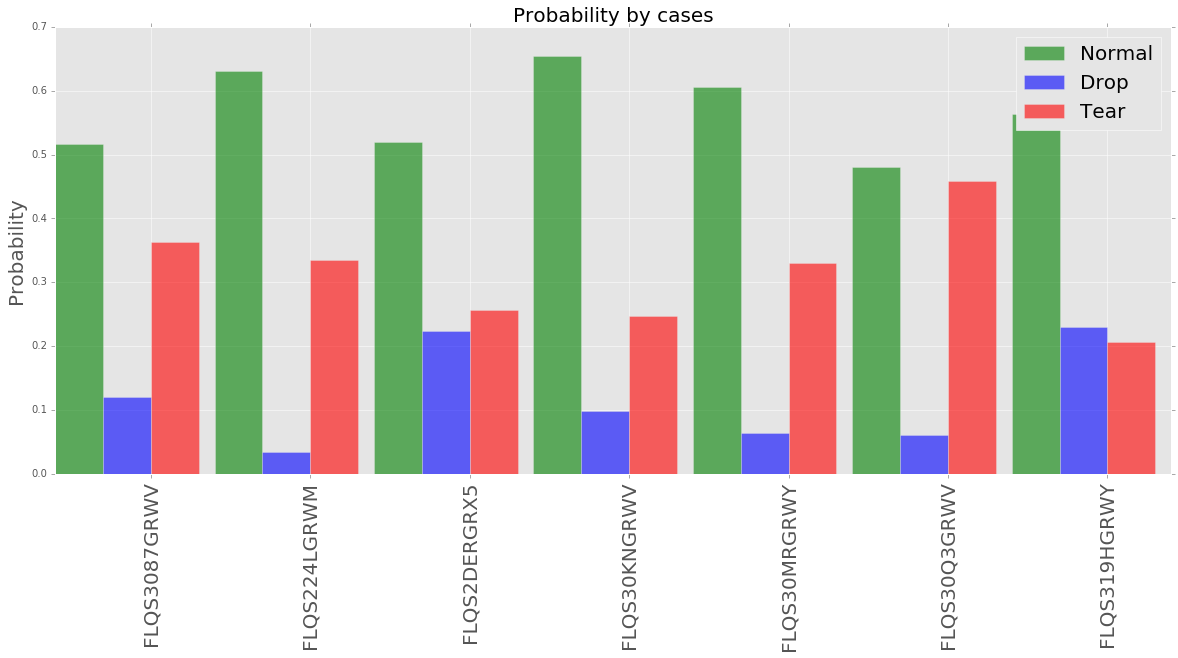

array(['duplicate', 'duplicate', 'duplicate', 'duplicate', 'duplicate',
       'duplicate', 'duplicate'], dtype=object)

In [126]:
surlib.predict_query(queryDf.loc[deformList],\
                    model=model, column=columns)

In [124]:
deformList = ['FLQS3087GRWV_avg', 'FLQS224LGRWM_avg', 'FLQS2DERGRX5_avg', 'FLQS30KNGRWV_avg', 'FLQS30MRGRWY_avg',\
              'FLQS30Q3GRWV_avg', 'FLQS319HGRWY_avg']

0.0


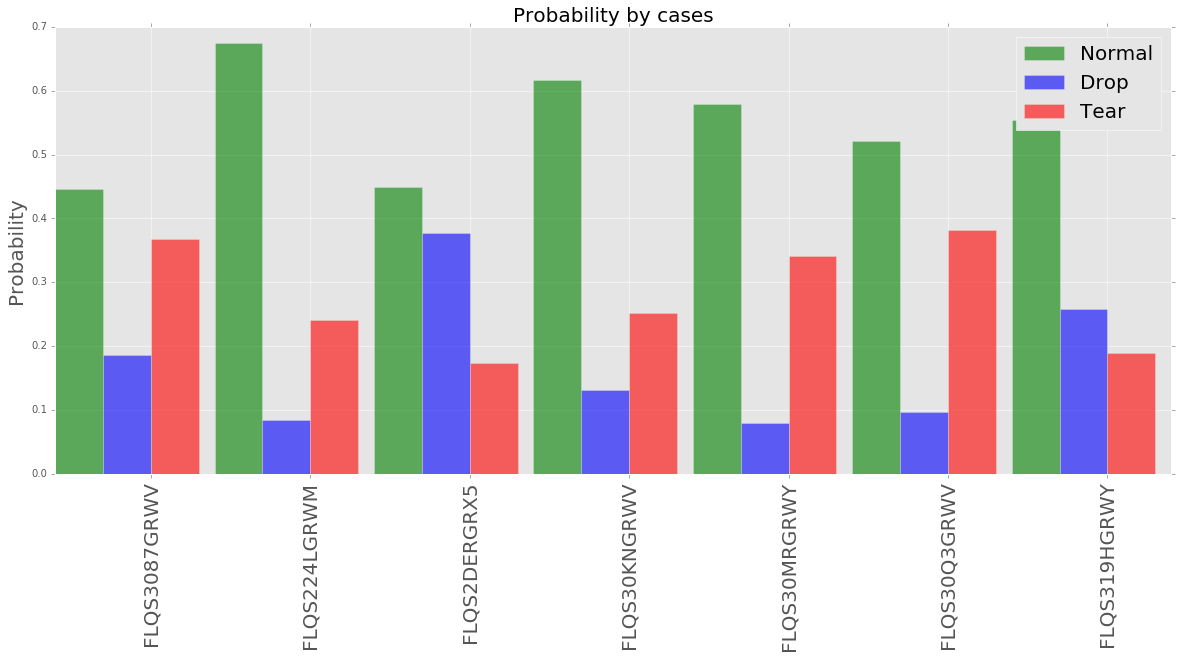

array(['duplicate', 'duplicate', 'duplicate', 'duplicate', 'duplicate',
       'duplicate', 'duplicate'], dtype=object)

In [125]:
surlib.predict_query(queryDfBefore.loc[deformList],\
                    model=model, column=columns)

0.0


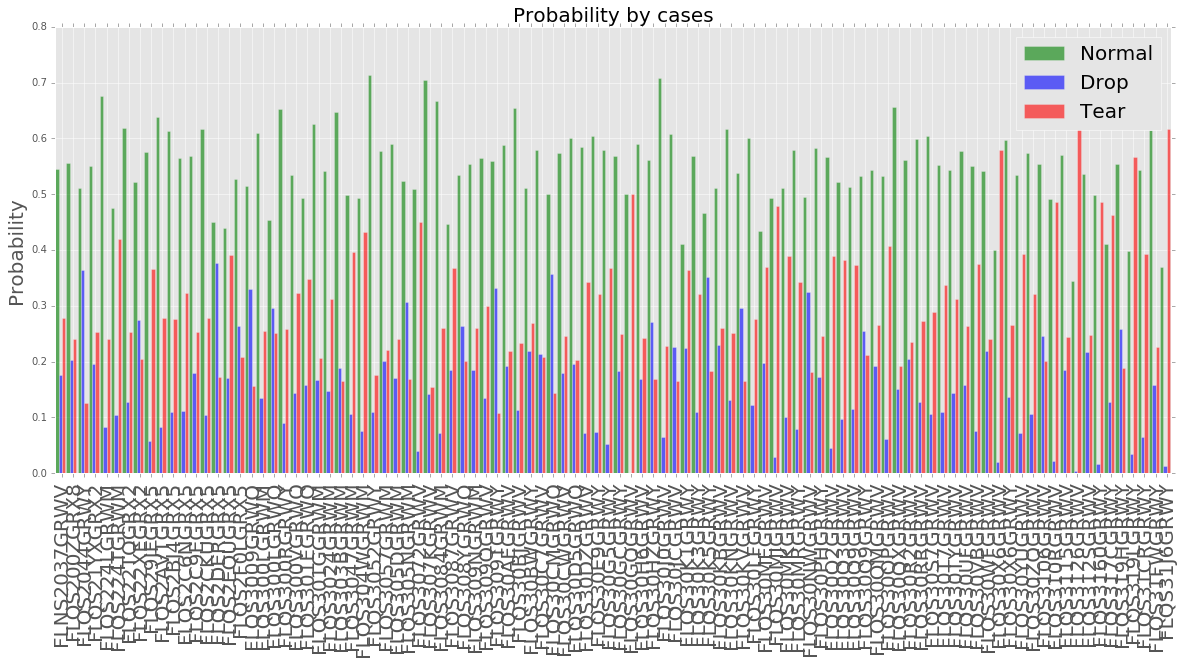

In [128]:
predictResult = surlib.predict_query(queryDfBefore, model=model, column=columns)

0.0


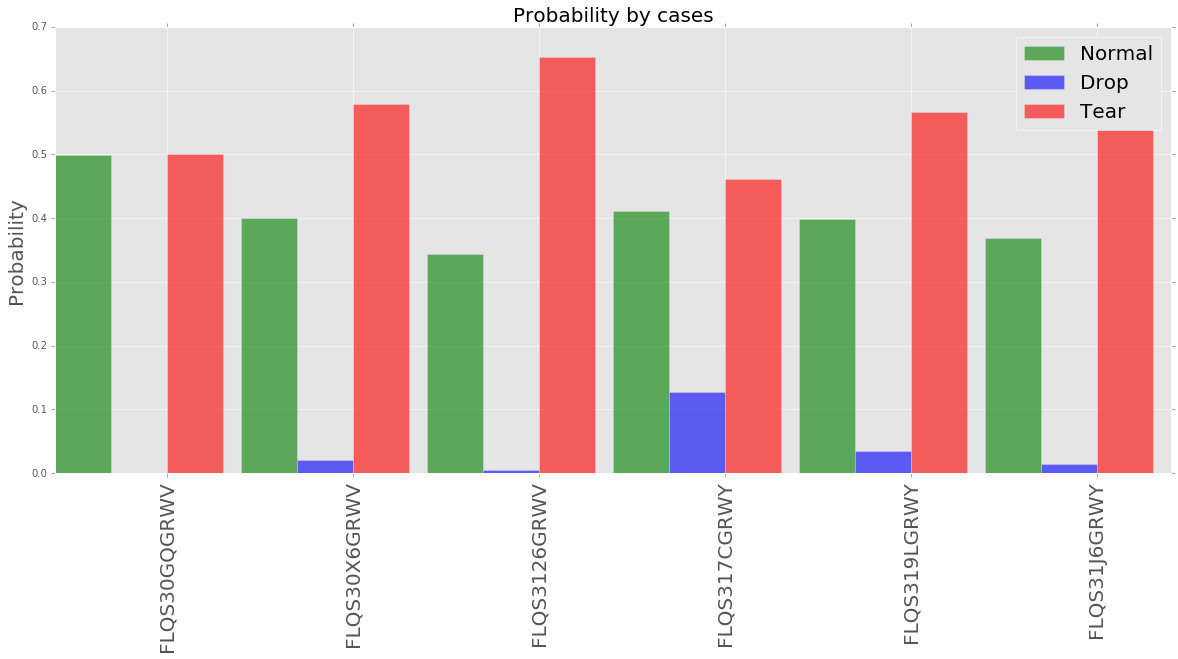

array(['tear', 'tear', 'tear', 'tear', 'tear', 'tear'], dtype=object)

In [133]:
surlib.predict_query(queryDfBefore[predictResult == 'tear'], model=model, column=columns)

0.0


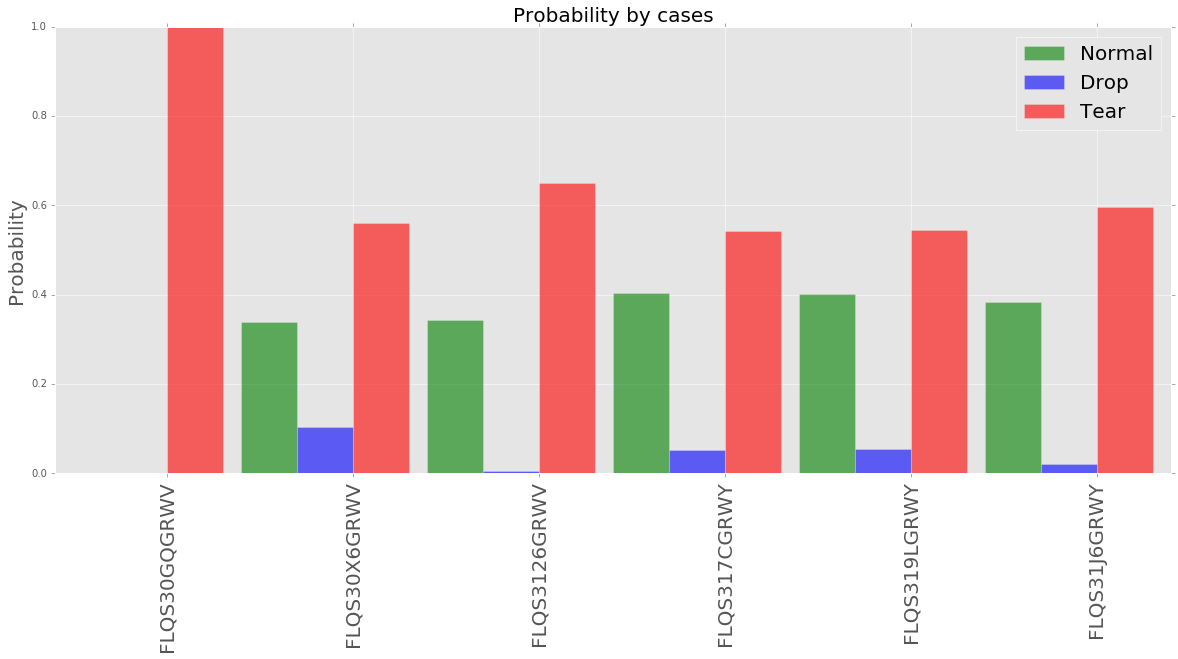

array(['tear', 'tear', 'tear', 'tear', 'tear', 'tear'], dtype=object)

In [134]:
surlib.predict_query(queryDf[predictResult == 'tear'], model=model, column=columns)